In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from datetime import datetime
from pathlib import Path
from workflow.pipeline import ephys, probe, lineage, analysis

In [4]:
ephys.LFP.Trace()

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
O09,2023-05-19 09:30:00,0,2023-05-19 13:00:00,2023-05-19 13:15:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,16,=BLOB=
O09,2023-05-18 18:15:00,0,2023-05-19 05:00:00,2023-05-19 05:15:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,27,=BLOB=
O13,2023-06-09 15:40:00,0,2023-06-09 20:10:00,2023-06-09 20:25:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,21,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 15:00:00,2023-05-19 15:15:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,13,=BLOB=
O13,2023-06-09 15:40:00,0,2023-06-10 11:10:00,2023-06-10 11:25:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
O09,2023-05-18 18:15:00,0,2023-05-18 22:45:00,2023-05-18 23:00:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,=BLOB=
O09,2023-05-19 15:45:00,0,2023-05-20 05:00:00,2023-05-20 05:15:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,12,=BLOB=
O09,2023-05-19 15:45:00,0,2023-05-19 16:00:00,2023-05-19 16:15:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,22,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 13:45:00,2023-05-19 14:00:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
O09,2023-05-19 15:45:00,0,2023-05-20 09:15:00,2023-05-20 09:30:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=


In [7]:
key = {
    "organoid_id": "O09",
    "experiment_start_time": datetime(2023, 5, 18, 12, 25),
    "insertion_number": 0,
    "start_time": datetime(2023, 5, 18, 12, 25),
    "end_time": datetime(2023, 5, 18, 12, 40),
}  # organoid key

In [18]:
(ephys.LFP.Trace & key)

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=


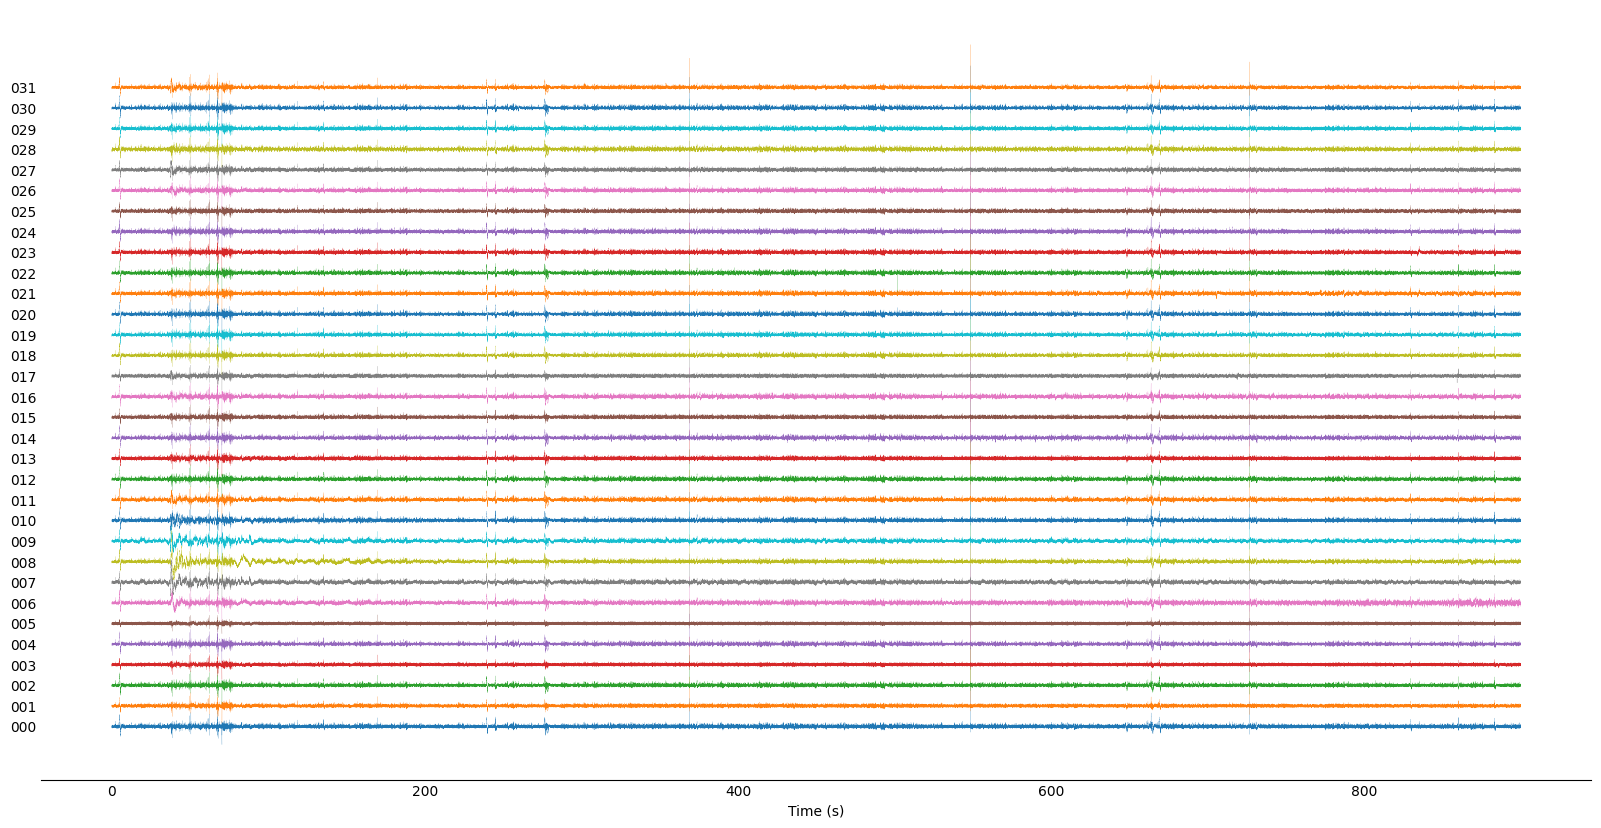

In [9]:
lfp_traces, ti, tf, electrodes = (ephys.LFP.Trace & key).fetch(
    "lfp", "start_time", "end_time", "electrode"
)
sampling_rate = (ephys.LFP & key).fetch1("lfp_sampling_rate")

idx = np.argsort(electrodes)

labels = np.array([f"D-0{x}" for x in electrodes])

labels = labels[idx]
lfp_traces = lfp_traces[idx]
electrodes = electrodes[idx]

# Plot all channels (sorted according to electrodes)
fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
for i, (lfp_trace, electrode) in enumerate(zip(lfp_traces, electrodes)):
    ytick_loc.append(i * 500)
    ax.plot(np.r_[: len(lfp_trace)] / sampling_rate, lfp_trace + i * 500, linewidth=0.1)
ax.set_yticks(ytick_loc)
ax.set_yticklabels([f"{x:03d}" for x in electrodes])
ax.tick_params(length=0)
ax.set(xlabel="Time (s)")
sns.despine(right=True, left=True)
plt.show()

### Spectral Analysis

In [10]:
analysis.SpectralBand()

band_name,lower_freq (Hz),upper_freq (Hz)
alpha,8.0,12.0
beta,13.0,30.0
delta,2.0,4.0
gamma,30.0,50.0
highgamma1,70.0,110.0
highgamma2,130.0,500.0
theta,4.0,7.0


In [11]:
analysis.SpectrogramParameters()

param_idx,window_size Time in seconds,overlap_size Time in seconds,description
0,0.5,0.0,Default 0.5s time segments without overlap.


In [12]:
analysis.LFPSpectrogram.populate(key)
display(analysis.LFPSpectrogram())

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,0


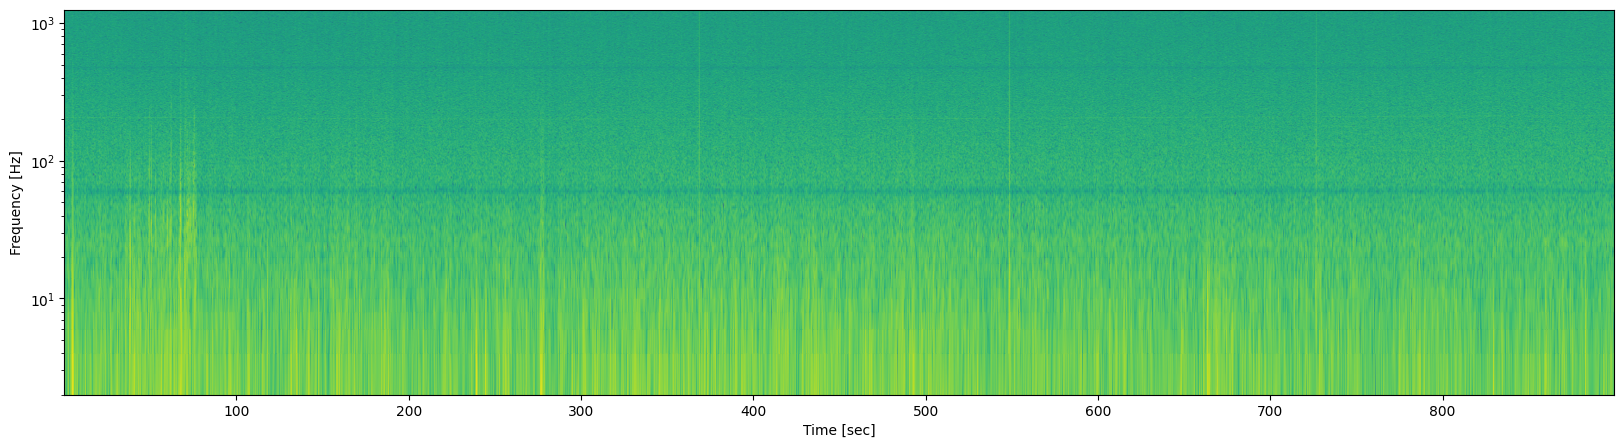

In [13]:
electrode = 1  # select electrode

Sxx, t, f = (
    analysis.LFPSpectrogram.ChannelSpectrogram & {"electrode": electrode}
).fetch("spectrogram", "time", "frequency", limit=1)
Sxx = Sxx[0]
t = t[0]
f = f[0]

fig, ax = plt.subplots(figsize=(20, 5))
ax.pcolormesh(t, f[1:1000], np.log(Sxx[1:1000]), shading="gouraud")
plt.yscale("log")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()

In [14]:
(analysis.LFPSpectrogram.ChannelPower & {"electrode": electrode})

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx,band_name,power Mean power in spectral band as a function of time,mean_power Mean power in a spectral band for a time window.,std_power Standard deviation of the power in a spectral band for a time window.
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,alpha,=BLOB=,5.29126,9.72325
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,beta,=BLOB=,2.05279,2.70218
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,delta,=BLOB=,26.8611,93.5126
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,gamma,=BLOB=,0.9471,2.6435
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,highgamma1,=BLOB=,0.273438,0.319691
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,highgamma2,=BLOB=,0.0834985,0.0376595
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,theta,=BLOB=,10.8656,23.4877
O09,2023-05-18 12:25:00,0,2023-05-18 12:40:00,2023-05-18 12:55:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,alpha,=BLOB=,3.13559,16.0641
O09,2023-05-18 12:25:00,0,2023-05-18 12:40:00,2023-05-18 12:55:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,beta,=BLOB=,1.30447,6.35113
O09,2023-05-18 12:25:00,0,2023-05-18 12:40:00,2023-05-18 12:55:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,delta,=BLOB=,31.7687,149.604
